<img src="ublogo.png"/>

# CSE474/574 - Introduction to Machine Learning

  - Python Demonstrations
  - Instructor - Varun Chandola


In [65]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from scipy.stats import bernoulli
sns.set(color_codes=True)
sns.set_style('white')
sns.set_context('paper',font_scale=2)
from mpl_toolkits import mplot3d
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%matplotlib inline

# Constructing a toy data set

We will consider a simple data set with two features (`GPA` and `Interview Score`) and one target - `Future Job Performance`. Additionally, there is one *sensitive attribute* which we will denote as `Sensitive Attribute` and will take one of two values. In real world, this could be race, gender, etc.

In [116]:
# randomly sample data
X = datasets.make_blobs(n_samples=1200,n_features=2,centers=1)
X = X[0]

In [117]:
thetas = (X[:,0]-np.min(X[:,0]))/np.max(X[:,0])



In [119]:
# assign sensitive attribute -- biased by GPA
thetas[thetas<0.5] = 0.1
thetas[thetas>=0.5] = .9
sattr = []
for t in thetas:
    sattr.append(bernoulli(t).rvs(1))
sattr = np.array(sattr).flatten()

In [127]:
# add a target - job performance as a function of GPA and Interview Score
weights = np.array([1.5,1,-1])
y = bernoulli(1/(1 + np.exp(-np.dot(np.hstack([np.ones([X.shape[0],1]),X]),weights[:,np.newaxis])))).rvs(np.array([X.shape[0],1]))
print(y.sum())

567


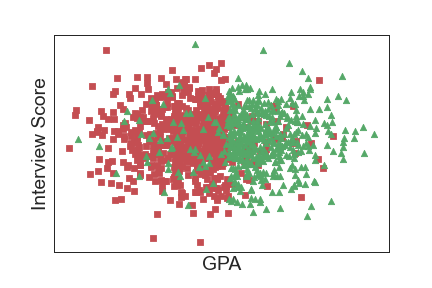

In [128]:
plt.scatter(X[np.where(sattr==0)[0],0],X[np.where(sattr==0)[0],1],c='r',s=40,marker='s')
plt.scatter(X[np.where(sattr==1)[0],0],X[np.where(sattr==1)[0],1],c='g',s=40,marker='^')

plt.grid(False)
tt = plt.xticks([]),plt.yticks([])
plt.ylabel('Interview Score')
tt = plt.xlabel('GPA')

In [129]:
Xtrain = X[0:200,:]
ytrain = y[0:200,:]
Xtest = X[200:,:]
ytest = y[200:,:]
md = LogisticRegression()
md.fit(Xtrain,ytrain.flatten())
predprobs = md.predict_proba(Xtest)[:,1]

In [137]:
df.groupby('Y').size()

Y
0.0    549
1.0    451
dtype: int64

In [130]:
df = pd.DataFrame(np.hstack([Xtest,ytest,sattr[200:,np.newaxis],predprobs[:,np.newaxis]]),
                  columns=['X1','X2','Y','A','R'])

In [135]:
df

,X1,X2,Y,A,R
0,2.508611,6.344552,0.0,0.0,0.151148
1,2.240415,5.226060,1.0,0.0,0.295129
2,3.447938,4.703757,0.0,0.0,0.673515
3,4.069043,5.924954,0.0,1.0,0.521249
4,2.993138,3.451832,1.0,0.0,0.823824
...,...,...,...,...,...
995,1.440347,4.413102,0.0,0.0,0.311755
996,2.646009,5.545086,0.0,0.0,0.305915
997,3.845556,4.228302,1.0,1.0,0.824408
998,1.872394,5.833291,0.0,0.0,0.142399


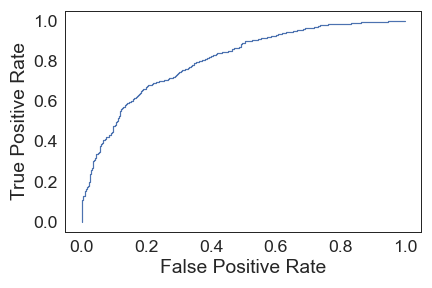

In [132]:
# ROC Curve for the entire data set
fpr, tpr, thresholds = roc_curve(df['Y'],df['R'])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

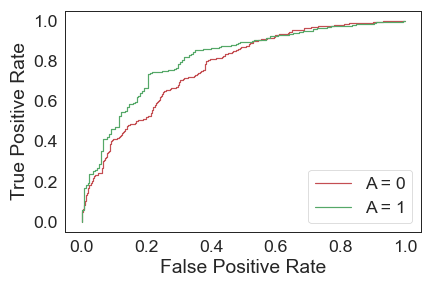

In [134]:
# ROC Curve for the each sensitive group separately
fpr, tpr, thresholds = roc_curve(df.loc[df['A'] == 0,'Y'],df.loc[df['A'] == 0,'R'])
plt.plot(fpr,tpr,'r')
fpr, tpr, thresholds = roc_curve(df.loc[df['A'] == 1,'Y'],df.loc[df['A'] == 1,'R'])
plt.plot(fpr,tpr,'g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.legend(['A = 0','A = 1'])